# Google reviews - feature selection and engineering 

In [1]:
import pandas as pd 
import numpy as np 

## import data

In [2]:
df1=pd.read_csv('googleplaystore.csv')
# this contains the features 

In [16]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull,Ratings_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,False,False


In [4]:
df2=pd.read_csv('googleplaystore_user_reviews.csv')
# this contains the thing we want to predict 

In [15]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## EDA of data 

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Reviews_isnull  10841 non-null  bool   
 14  Ratings_isnull  10841 non-null  bool   
dtypes: bool(2), float64(2), object(11)
memory usage: 1.1+ MB


In [20]:
df1['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [9]:
#force reviews into numeric
df1['Reviews']=pd.to_numeric(df1['Reviews'],errors='coerce')

In [11]:
#create a new column if null reviews
df1['Reviews_isnull']=df1['Reviews'].isnull()

In [13]:
#create a new column if null rating
df1['Ratings_isnull']=df1['Rating'].isnull()

## correlation matrix for numeric variables 

In [17]:
# in order to corr numeric col to the target var we join the dataframes
df_merged = pd.merge(df1, df2, on="App")
# merge by default behaves like an inner join 

In [18]:
df_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull,Ratings_isnull,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,I love colors inspyering,Positive,0.500,0.600000


### we need some more number fields 

In [40]:
df_merged['Installs'].value_counts()

10,000,000+       28076
100,000,000+      24740
1,000,000+        18040
5,000,000+        16880
50,000,000+        9420
100,000+           8064
500,000+           6488
1,000,000,000+     3960
500,000,000+       3334
10,000+            1709
50,000+            1471
1,000+              400
5,000+               80
Name: Installs, dtype: int64

In [45]:
df_merged['Installs_num'] = df_merged['Installs'].str.replace('+','')

/var/folders/f1/r1pbqcl133ddm5hycygrjx0r0000gp/T/ipykernel_1421/4186718878.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['Installs_num'] = df_merged['Installs'].str.replace('+','')


In [46]:
df_merged['Installs_num'] = df_merged['Installs_num'].str.replace(',','')

In [50]:
df_merged['Installs_num'].value_counts()

10000000      28076
100000000     24740
1000000       18040
5000000       16880
50000000       9420
100000         8064
500000         6488
1000000000     3960
500000000      3334
10000          1709
50000          1471
1000            400
5000             80
Name: Installs_num, dtype: int64

In [48]:
df_merged['Installs_num']=pd.to_numeric(df_merged['Installs_num'])

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  float64
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Reviews_isnull          122662 non-null  bool   
 14  Ratings_isnull      

In [51]:
df_merged.describe()

,Rating,Reviews,Sentiment_Polarity,Sentiment_Subjectivity,Installs_num
count,122622.000000,1.226620e+05,72615.000000,72615.000000,1.226620e+05
mean,4.322405,2.243249e+06,0.157320,0.494162,7.304089e+07
std,0.284766,6.324819e+06,0.332652,0.240144,1.896831e+08
min,2.500000,1.000000e+01,-1.000000,0.000000,1.000000e+03
25%,4.200000,2.752400e+04,0.000000,0.380000,1.000000e+06
50%,4.400000,1.598720e+05,0.129167,0.509740,1.000000e+07
75%,4.500000,1.500999e+06,0.356250,0.633333,1.000000e+08
max,4.900000,7.815831e+07,1.000000,1.000000,1.000000e+09


In [52]:
df_merged['Price'].unique()

array(['0', '$6.99', '$1.99', '$4.99', '$3.99', '$2.99', '$11.99',
       '$9.99', '$7.99', '$33.99', '$3.95', '$29.99', '$2.49', '$0.99'],
      dtype=object)

In [53]:
import re 

In [55]:
df_merged['Price_num']=df_merged['Price'].str.extract(r'(\d+)')

In [60]:
df_merged['Price_num'].unique()

array([ 0,  6,  1,  4,  3,  2, 11,  9,  7, 33, 29])

In [89]:
df_clean['Price_num'].value_counts()

0     71846
3       216
9       188
11      160
2        74
29       40
4        39
6         3
Name: Price_num, dtype: int64

In [59]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  float64
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Reviews_isnull          122662 non-null  bool   
 14  Ratings_isnull      

In [58]:
df_merged['Price_num']=pd.to_numeric(df_merged['Price_num'])

In [63]:
df_merged['Size'].value_counts()

Varies with device    47230
11M                    2500
14M                    2436
97M                    2360
74M                    2240
                      ...  
695k                     40
8.0M                     40
75M                      40
1.7M                     40
5.8M                     38
Name: Size, Length: 178, dtype: int64

In [64]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  float64
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Reviews_isnull          122662 non-null  bool   
 14  Ratings_isnull      

In [65]:
df_merged.drop(['Size'], axis = 1, inplace = True) 

In [66]:
df_merged.isna().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Reviews_isnull                0
Ratings_isnull                0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
Installs_num                  0
Price_num                     0
dtype: int64

In [67]:
#because of case study we need to drop any non reviewed apps 
df_clean=df_merged.dropna()

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72566 entries, 0 to 122661
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Category                72566 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72566 non-null  float64
 4   Installs                72566 non-null  object 
 5   Type                    72566 non-null  object 
 6   Price                   72566 non-null  object 
 7   Content Rating          72566 non-null  object 
 8   Genres                  72566 non-null  object 
 9   Last Updated            72566 non-null  object 
 10  Current Ver             72566 non-null  object 
 11  Android Ver             72566 non-null  object 
 12  Reviews_isnull          72566 non-null  bool   
 13  Ratings_isnull          72566 non-null  bool   
 14  Translated_Review       72566 non-nul

In [69]:
df_clean.reset_index(drop=True, inplace=True)

### correlation matrix for numeric variables 

In [91]:
corr_fields=df_clean[['Rating','Reviews','Sentiment_Polarity','Installs_num','Price_num']]

In [94]:
corr_matrix=corr_fields.corr(method='spearman')

In [95]:
corr_matrix

,Rating,Reviews,Sentiment_Polarity,Installs_num,Price_num
Rating,1.000000,0.405404,0.035904,0.264976,-0.010526
Reviews,0.405404,1.000000,-0.162763,0.937528,-0.136122
Sentiment_Polarity,0.035904,-0.162763,1.000000,-0.157719,0.030028
Installs_num,0.264976,0.937528,-0.157719,1.000000,-0.162103
Price_num,-0.010526,-0.136122,0.030028,-0.162103,1.000000


In [77]:
import seaborn as sns 
import matplotlib.pyplot as plt

<AxesSubplot:>

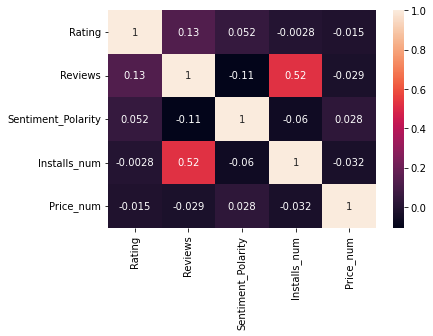

In [87]:
sns.heatmap(corr_matrix,annot=True)

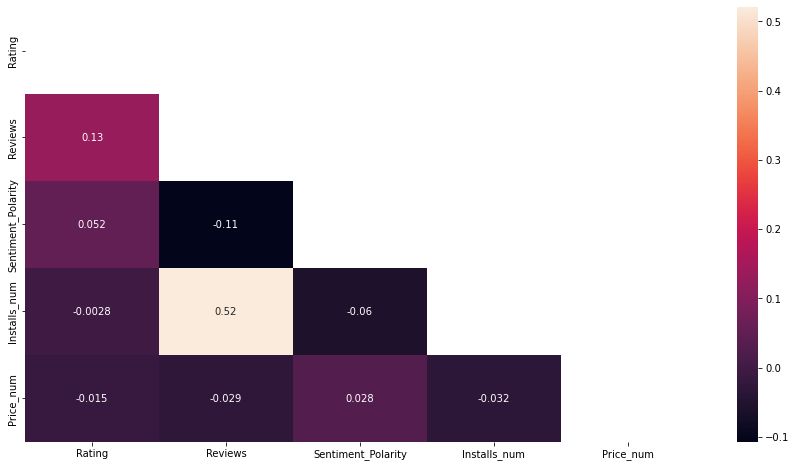

In [85]:
mask=np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

## VIF method 

- identify multicollinearity using VIF 

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features.


The greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
from sklearn.linear_model import LinearRegression

In [102]:
model=LinearRegression().fit(df_clean[['Reviews']],df_clean[['Installs_num']])

In [103]:
model_r2=model.score(df_clean[['Reviews']],df_clean[['Installs_num']])
model_VIF=1/(1-model_r2)

In [104]:
model_VIF

1.3720358397044186

In [105]:
model_r2

0.27115606527054514

In [ ]:
# extension to this - use VIF to identify strong pairs,
# or use VIF as a threshold to eliminate features


## CHI SQUARED 

- we can use this for objects / categories 
- identify features which are NOT independent 
- ML models assume INDEPENDENCE 
- if not true... in some cases this will have a BIG effect on the model success - your inference will be clouded 

In [ ]:
hypothesis - these two fields are not independent 
chi sq statistic 
p value 
degrees of freedom 
table of results 

In [106]:
df_clean['Android Ver'].unique()

array(['4.0.3 and up', '3.0 and up', '4.0 and up', '4.1 and up',
       '2.3.3 and up', '4.2 and up', '5.0 and up', '2.3 and up',
       'Varies with device', '1.6 and up', '1.5 and up', '4.4 and up',
       '7.0 and up', '2.2 and up', '4.3 and up', '4.0.3 - 7.1.1',
       '2.1 and up', '2.0 and up', '6.0 and up', '7.1 and up',
       '3.2 and up', '5.0 - 8.0'], dtype=object)

In [115]:
df_clean['Last Updated'].value_counts()

2018-07-31    5968
2018-08-01    4421
2018-08-03    4231
2018-08-02    3260
2018-08-06    3228
              ... 
2017-05-19       1
2016-05-11       1
2015-03-13       1
2016-06-07       1
2017-01-16       1
Name: Last Updated, Length: 250, dtype: int64

In [113]:
#change date in this format to datetype 
df_clean['Last Updated']=pd.to_datetime(df_clean['Last Updated'],format='%B%d,%Y')

/var/folders/f1/r1pbqcl133ddm5hycygrjx0r0000gp/T/ipykernel_1421/3781712723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Last Updated']=pd.to_datetime(df_clean['Last Updated'],format='%B%d,%Y')


In [116]:
# extract year and month 
df_clean['Update_month_year'] = pd.to_datetime(df_clean['Last Updated']).dt.to_period('M')

/var/folders/f1/r1pbqcl133ddm5hycygrjx0r0000gp/T/ipykernel_1421/2317128006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Update_month_year'] = pd.to_datetime(df_clean['Last Updated']).dt.to_period('M')


In [117]:
df_clean['Update_month_year'].unique()

<PeriodArray>
['2018-01', '2017-09', '2018-08', '2018-03', '2017-10', '2018-07', '2018-06',
 '2018-05', '2017-08', '2017-03', '2015-07', '2018-02', '2018-04', '2016-04',
 '2016-06', '2014-07', '2017-01', '2017-02', '2017-12', '2014-08', '2015-08',
 '2015-06', '2015-04', '2013-12', '2016-09', '2016-12', '2015-01', '2017-07',
 '2017-11', '2016-08', '2015-03', '2013-03', '2012-01', '2011-06', '2016-11',
 '2017-04', '2016-07', '2014-12', '2016-10', '2016-02', '2017-05', '2015-10',
 '2017-06', '2016-03', '2014-04', '2016-05', '2014-05', '2015-12', '2013-09',
 '2015-02', '2015-05']
Length: 51, dtype: period[M]

In [119]:
from scipy.stats import chi2_contingency

In [120]:
data_crosstab=pd.crosstab(df_clean['Update_month_year'],df_clean['Android Ver'], margins=False)

In [121]:
data_crosstab

Android Ver,1.5 and up,1.6 and up,2.0 and up,2.1 and up,2.2 and up,2.3 and up,2.3.3 and up,3.0 and up,3.2 and up,4.0 and up,...,4.1 and up,4.2 and up,4.3 and up,4.4 and up,5.0 - 8.0,5.0 and up,6.0 and up,7.0 and up,7.1 and up,Varies with device
Update_month_year,,,,,,,,,,,,,,,,,,,,,
2011-06,0,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01,0,0,0,0,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03,0,0,0,0,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09,0,0,0,0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-12,0,0,0,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04,0,16,0,0,0,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,0
2014-05,0,0,0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-07,0,0,34,0,0,90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-08,0,0,0,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
chi2_contingency(data_crosstab, correction=False)

(336268.5341642385,
 0.0,
 1050,
 array([[1.41388529e-02, 2.67894055e-02, 1.26505526e-02, ...,
         2.71614806e-02, 1.48830031e-02, 7.35331974e+00],
        [1.93754651e-02, 3.67114075e-02, 1.73359425e-02, ...,
         3.72212882e-02, 2.03952264e-02, 1.00767715e+01],
        [1.93754651e-02, 3.67114075e-02, 1.73359425e-02, ...,
         3.72212882e-02, 2.03952264e-02, 1.00767715e+01],
        ...,
        [3.01890693e+00, 5.72003418e+00, 2.70112725e+00, ...,
         5.79947909e+00, 3.17779676e+00, 1.57006994e+03],
        [1.65524075e+01, 3.13624562e+01, 1.48100488e+01, ...,
         3.17980459e+01, 1.74235868e+01, 8.60855865e+03],
        [9.37405948e+00, 1.77613759e+01, 8.38731637e+00, ...,
         1.80080616e+01, 9.86743103e+00, 4.87525099e+03]]))

In [ ]:
# i reject my hypothesis - 
# this means these two fields are NOT closely related 
# automated methods to keep or lose features based on chi sq 